In [1]:
# import libraries

# maths
import numpy as np
import pandas as pd
import scipy.stats as stats
from pandas.api.types import is_numeric_dtype

# visual
#from matplotlib_venn import venn2
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon



### Import data

In [29]:
train = pd.read_csv('../datasets/train.csv')
map_plot = gpd.read_file('../assets/Chicago Boundaries/geo_export_d41dc94d-31ce-478c-902c-864695385885.shp')
spray = pd.read_csv('../datasets/spray.csv')

In [3]:
# Change Date to datetime and add Week and Year
train['Date'] = pd.to_datetime(train['Date'])
train['Year'] = (train['Date'].dt.strftime('%Y')).astype(int)
train['Month'] = (train['Date'].dt.month.astype(int))
train['Week'] = (train['Date'].dt.strftime('%W')).astype(int)
train['Day'] = (train['Date'].dt.day.astype(int))



In [4]:
#Drop address columns and Date
train.drop(['Address','AddressNumberAndStreet','AddressAccuracy','Date'],inplace = True,axis = 1)

In [5]:
train.columns = map(str.lower, train.columns)
train.head(3)

,species,block,street,trap,latitude,longitude,nummosquitos,wnvpresent,year,month,week,day
0,CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,41.954690,-87.800991,1,0,2007,5,22,29
1,CULEX RESTUANS,41,N OAK PARK AVE,T002,41.954690,-87.800991,1,0,2007,5,22,29
2,CULEX RESTUANS,62,N MANDELL AVE,T007,41.994991,-87.769279,1,0,2007,5,22,29


### EDA for train

In [6]:
train_year = list(train.year.unique())
train_year

[2007, 2009, 2011, 2013]

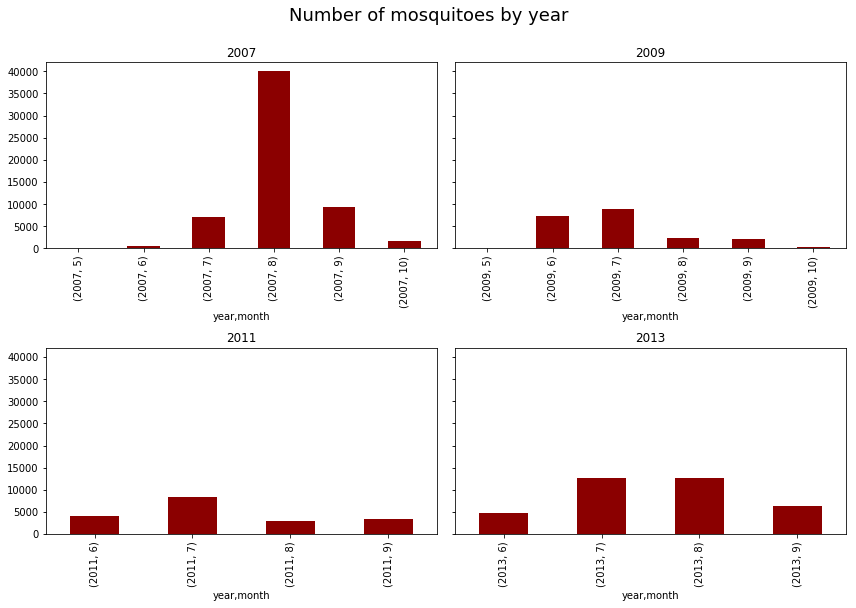

In [7]:
#no. of mosquitoes by year
#generally more cases in July and Aug- Higher temperatures in summer could lead to more mosquitoes
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8),sharey=True)
ax = ax.ravel()
plt.suptitle('Number of mosquitoes by year', fontsize=18, y=1.05)
for i, y in enumerate(train_year):
    train[train['year']==y].groupby(['year', 'month']).nummosquitos.sum().plot(kind='bar', ax=ax[i],color='darkred')
    ax[i].set_title(y)
plt.tight_layout()

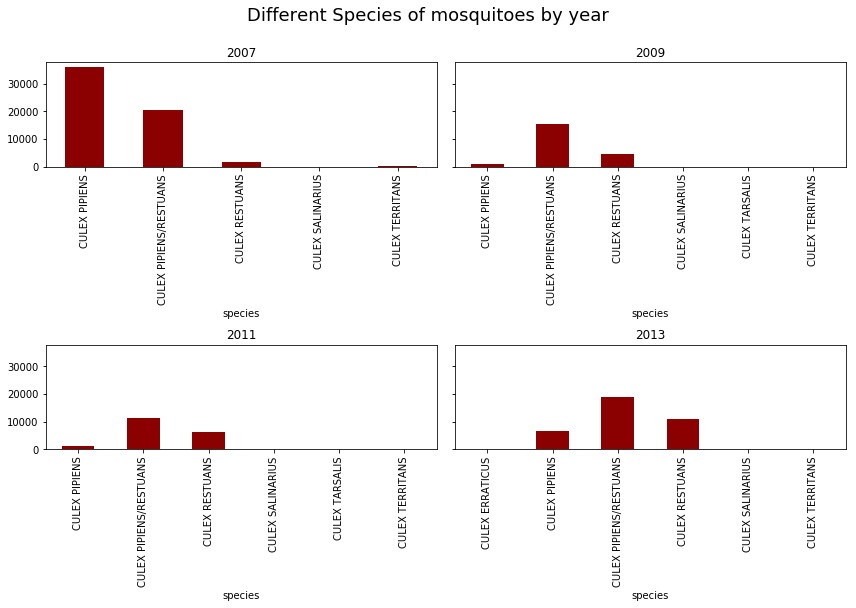

In [8]:
#different mosquitoes each year
#Higher populations of certain species 
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8),sharey=True)
ax = ax.ravel()
plt.suptitle('Different Species of mosquitoes by year', fontsize=18, y=1.05)
for i, y in enumerate(train_year):
    train[train['year']==y].groupby(['species']).nummosquitos.sum().plot(kind='bar', ax=ax[i],color='darkred')
    ax[i].set_title(y)
plt.tight_layout()

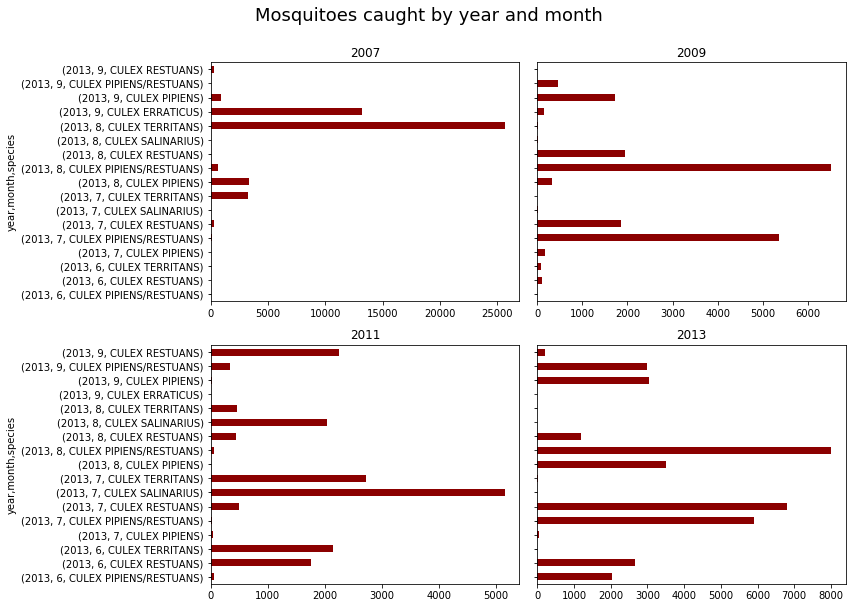

In [9]:
#number of mosquitoes by year and month
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8),sharey=True)
ax = ax.ravel()
plt.suptitle('Mosquitoes caught by year and month', fontsize=18, y=1.05)
for i, y in enumerate(train_year):
    train[train['year']==y].groupby(['year','month','species']).nummosquitos.sum().plot(kind='barh', ax=ax[i],color='darkred')
    ax[i].set_title(y)
plt.tight_layout()

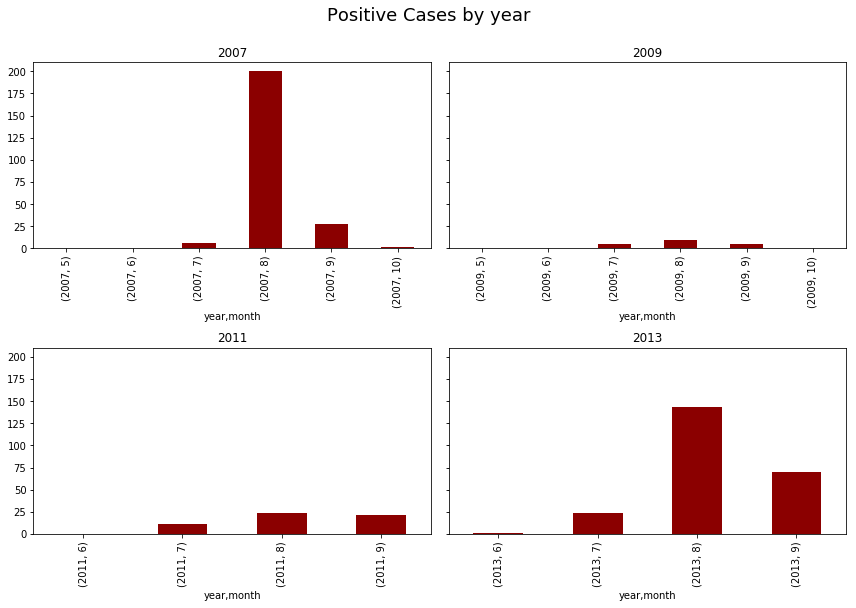

In [10]:
#positive WNV by year and month
#similarly, more positive cases during summer period
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8),sharey=True)
ax = ax.ravel()
plt.suptitle('Positive Cases by year', fontsize=18, y=1.05)
for i, y in enumerate(train_year):
    train[train['year']==y].groupby(['year','month']).wnvpresent.sum().plot(kind='bar', ax=ax[i],color='darkred')
    ax[i].set_title(y)
plt.tight_layout()

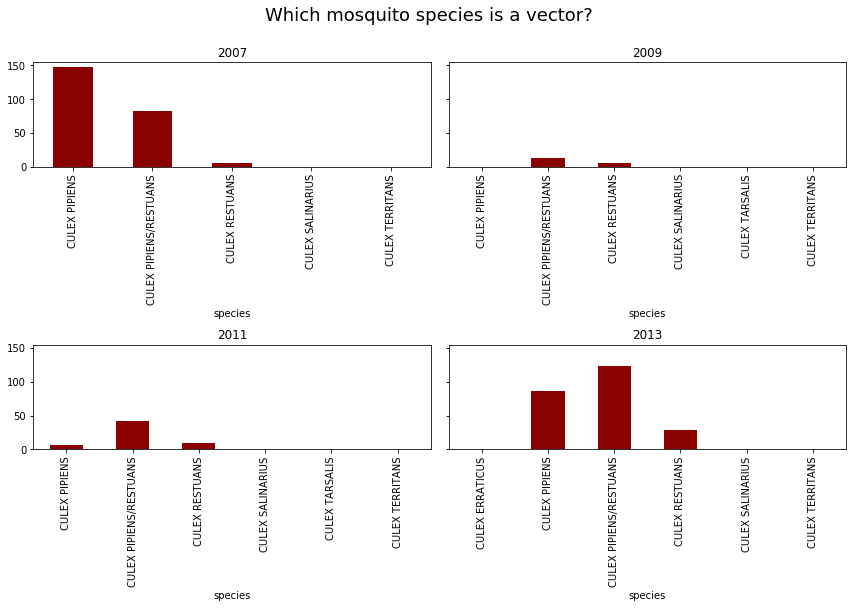

In [11]:
#positive WNV by by species
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8),sharey=True)
ax = ax.ravel()
plt.suptitle('Which mosquito species is a vector?', fontsize=18, y=1.05)
for i, y in enumerate(train_year):
    train[train['year']==y].groupby(['species']).wnvpresent.sum().plot(kind='bar', ax=ax[i],color='darkred')
    ax[i].set_title(y)
plt.tight_layout()

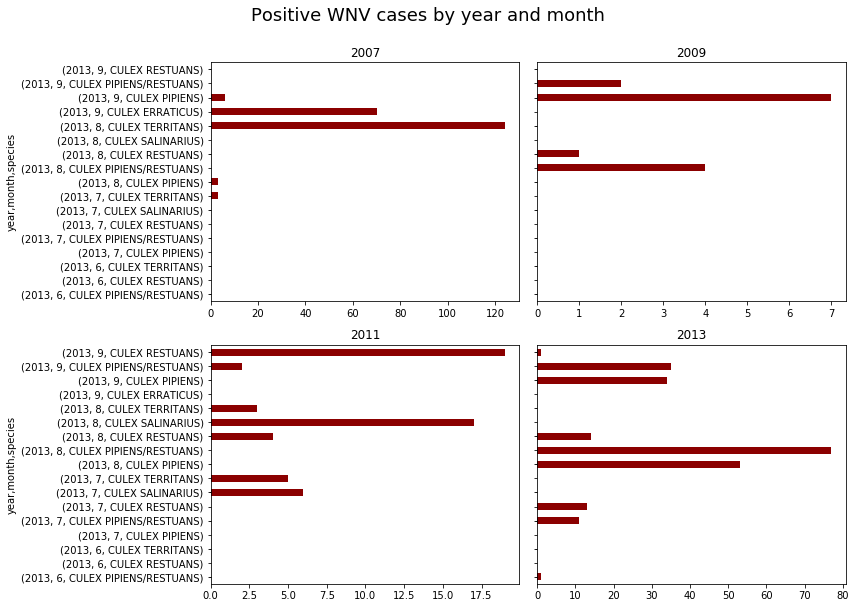

In [12]:
#Positive WNV cases by year and month
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8),sharey=True)
ax = ax.ravel()
plt.suptitle('Positive WNV cases by year and month', fontsize=18, y=1.05)
for i, y in enumerate(train_year):
    train[train['year']==y].groupby(['year','month','species']).wnvpresent.sum().plot(kind='barh', ax=ax[i],color='darkred')
    ax[i].set_title(y)
plt.tight_layout()

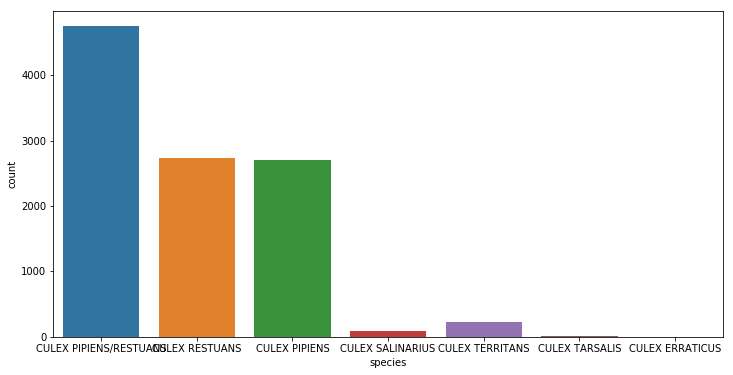

In [13]:
#countplot
plt.figure(figsize=(12,6))
sns.countplot(train.species)

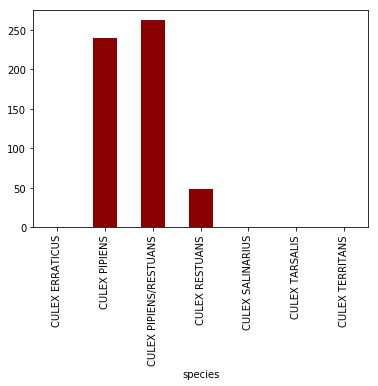

In [14]:
#only these 3 species are vectors
train.groupby('species').wnvpresent.sum().plot(kind='bar',color='darkred')

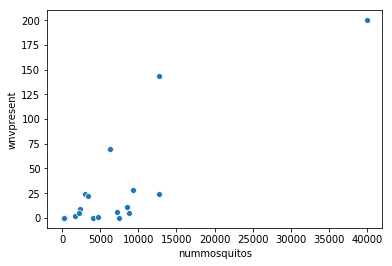

In [15]:
#more mosqutoes means more positive wnv
sns.scatterplot(x=train.groupby(['year', 'month']).nummosquitos.sum(),
                y= train.groupby(['year', 'month']).wnvpresent.sum(),
               data=train)

### EDA for Spray

In [16]:
spray.columns = map(str.lower, spray.columns)

Spraying seems to be done in the evening (maybe its due to mosquitoes being more active) between 6-9pm. Suggest to drop

In [17]:
spray.drop('time',inplace = True,axis=1)

In [18]:
# Change Date to datetime and add Week and Year
spray['date'] = pd.to_datetime(spray['date'])
spray['year'] = (spray['date'].dt.strftime('%Y')).astype(int)
spray['month'] = (spray['date'].dt.month.astype(int))
spray['week'] = (spray['date'].dt.strftime('%W')).astype(int)
spray['day'] = (spray['date'].dt.day.astype(int))


In [19]:
spray.drop('date',inplace = True,axis=1)

In [20]:
spray.head()

,latitude,longitude,year,month,week,day
0,42.391623,-88.089163,2011,8,35,29
1,42.391348,-88.089163,2011,8,35,29
2,42.391022,-88.089157,2011,8,35,29
3,42.390637,-88.089158,2011,8,35,29
4,42.390410,-88.088858,2011,8,35,29


In [21]:
spray_year = list(spray.year.unique())
spray_year

[2011, 2013]

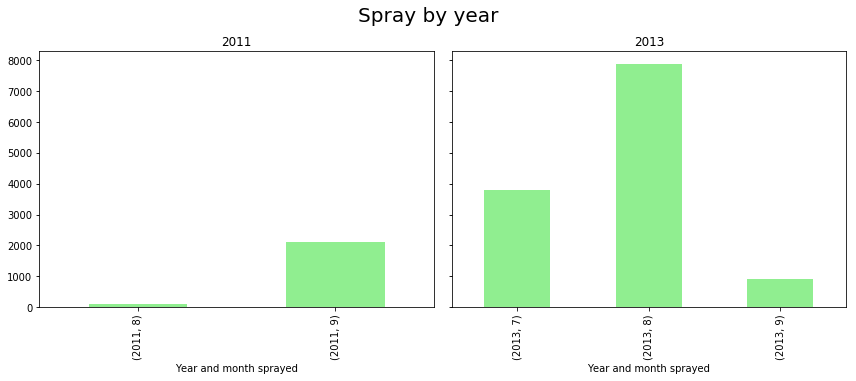

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5),sharey=True)
ax = ax.ravel()
plt.suptitle('Spray by year', fontsize=20, y=1.05)
for i, y in enumerate(spray_year):
    spray[spray['year']==y].groupby(['year', 'month']).latitude.count().plot(kind='bar', ax=ax[i],color='lightgreen')
    ax[i].set_title(y)
    ax[i].set_xlabel('Year and month sprayed')
plt.tight_layout()

In [27]:
crs = {'init': 'epsg:4326'}

In [25]:
geometry_spray = [Point(xy) for xy in zip(spray['longitude'], spray['latitude'])]
geo_spray_df = gpd.GeoDataFrame(spray,
                      crs=crs,
                      geometry=geometry_spray)
geo_spray_df.head()

,latitude,longitude,year,month,week,day,geometry
0,42.391623,-88.089163,2011,8,35,29,POINT (-88.0891633333333 42.3916233333333)
1,42.391348,-88.089163,2011,8,35,29,POINT (-88.0891633333333 42.3913483333333)
2,42.391022,-88.089157,2011,8,35,29,POINT (-88.0891566666667 42.3910216666667)
3,42.390637,-88.089158,2011,8,35,29,POINT (-88.0891583333333 42.3906366666667)
4,42.390410,-88.088858,2011,8,35,29,POINT (-88.08885833333331 42.39041)


In [24]:
geometry_train = [Point(xy) for xy in zip(train['longitude'], train['latitude'])]

geo_df = gpd.GeoDataFrame(train,
                      crs=crs,
                      geometry=geometry_train)
geo_df.head()

,species,block,street,trap,latitude,longitude,nummosquitos,wnvpresent,year,month,week,day,geometry
0,CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,41.954690,-87.800991,1,0,2007,5,22,29,POINT (-87.800991 41.95469)
1,CULEX RESTUANS,41,N OAK PARK AVE,T002,41.954690,-87.800991,1,0,2007,5,22,29,POINT (-87.800991 41.95469)
2,CULEX RESTUANS,62,N MANDELL AVE,T007,41.994991,-87.769279,1,0,2007,5,22,29,POINT (-87.769279 41.994991)
3,CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,41.974089,-87.824812,1,0,2007,5,22,29,POINT (-87.82481199999999 41.974089)
4,CULEX RESTUANS,79,W FOSTER AVE,T015,41.974089,-87.824812,4,0,2007,5,22,29,POINT (-87.82481199999999 41.974089)


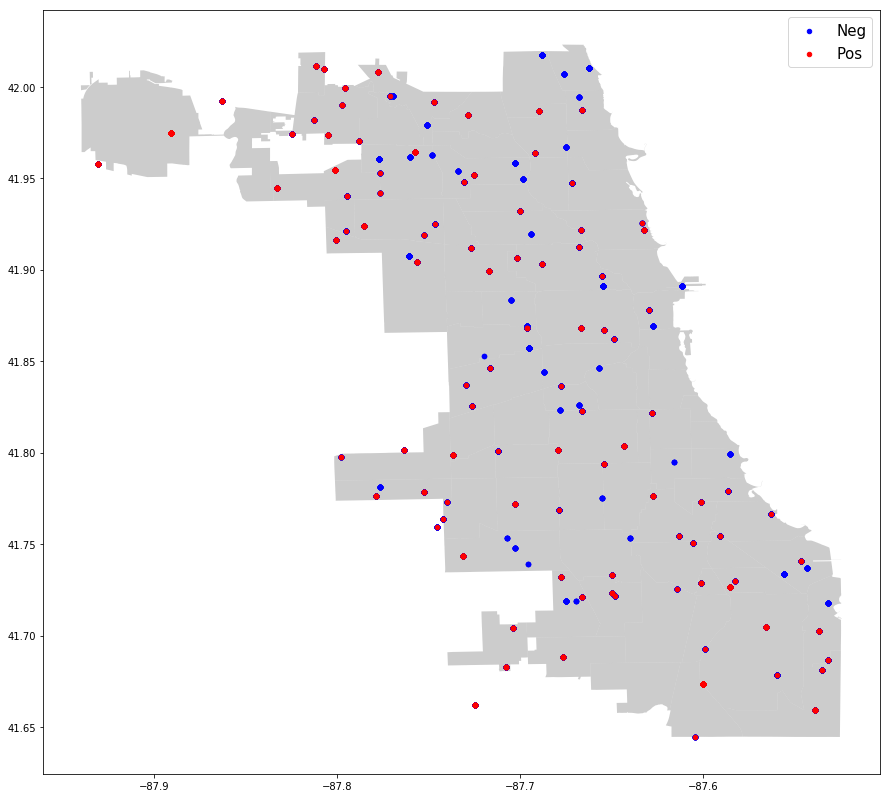

In [31]:
#plot on map
#but like no pattern?
fig, ax = plt.subplots(figsize=(15,15))
map_plot.plot(ax=ax, alpha=0.4, color='grey')
geo_df[geo_df['wnvpresent']==0].plot(ax=ax, markersize=20, color='blue', marker='o', label='Neg')
geo_df[geo_df['wnvpresent']==1].plot(ax=ax, markersize=20, color='red', marker='o', label='Pos')
plt.legend(prop={'size': 15})